# **House Price Prediction**
This project aims to predict the house prices of residential houses in Ames,Iowas. This project showcases my knowledge in numpy, pandas, matplotlib, scikit-learn, and TensorFlow by building a machine learning model to predict house prices. This project involves data preprocessing, exploratory data analysis, feature engineering, model training, and evaluation.

## 🚀 **About Me**

I am a Machine Learning enthusiast who is constantly seeking new opportunities to learn and grow. I enjoy working on self projects, where I can express myself creatively and upskill myself.

**LinkedIn:** https://www.linkedin.com/in/carolina-veloso/

**GitHub:** https://github.com/glass-bead

## **1 - Imports**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark',)
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=0.7)
sns.set_palette('PiYG')
#sns.set_palette('PuRd')
import missingno as msno
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **1 - Data Collection and Overview**

In [92]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [38]:
# Check dataset size (number of rows and number of features)grliv
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 1460
Number of columns: 81


In [40]:
# Total number of numerical features
numerical_features = list(data.select_dtypes(exclude = 'object').columns)
print("\nTotal no of numerical features: ", len(numerical_features))
print("Numerical features: ", numerical_features)

# Total number of categorical features
categorical_features = list(data.select_dtypes(include = 'object').columns)
print("\nTotal no of categorical features: ", len(categorical_features))
print("Categorical features: ", categorical_features)


Total no of numerical features:  38
Numerical features:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Total no of categorical features:  43
Categorical features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 

Let's get an idea of how the different features are correlated with one another.

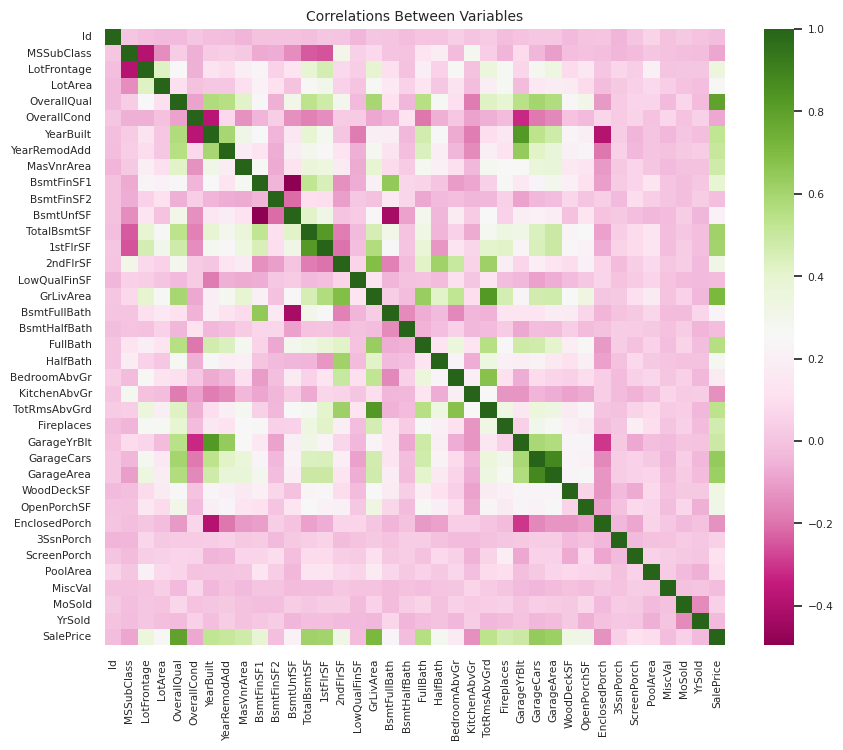

In [42]:
plot = plt.figure(figsize=(10,8))
hm = sns.heatmap(data.corr(), cmap="PiYG")
title = plt.title("Correlations Between Variables", size=10)
plt.show()

### **Analysing "SalePrice"**
Out of 81 features, one of them is our prediction target - `SalePrice`. Through analysis we can conclude the following:

* `SalePrice` only has positive values (since its minimum value is higher than 0)
* `SalePrice` distribution is positively skewed (tail to the right), meaning the mean is greater than the median
* `SalePrice` shows a significant correlation with the features `SalePrice`, `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF`, `1stFlrSF`, `FullBath`, `TotRmsAbvGrd`, `YearBuilt` 

* `GrLivArea`,`TotalBsmtSF` and `1stFlrSF` seem to have a linear relationship with `SalePrice`. It also seems that, the better the overall quality (`OverallQuality`), the higher the price of the houses. The more `GarageCars` and `FullBath`, the higher the price as well.

In [55]:
# Get target
target = data.SalePrice

In [45]:
# Some basic information about the target
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

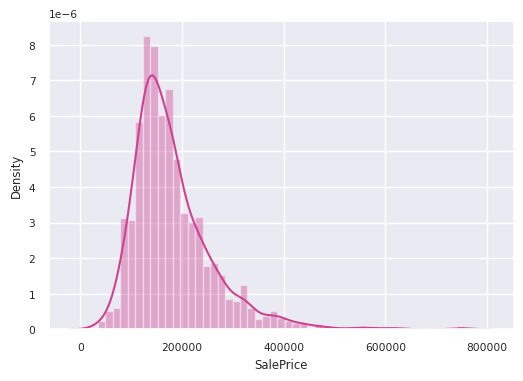

In [47]:
# SalePrice distribution
sns.distplot(target);

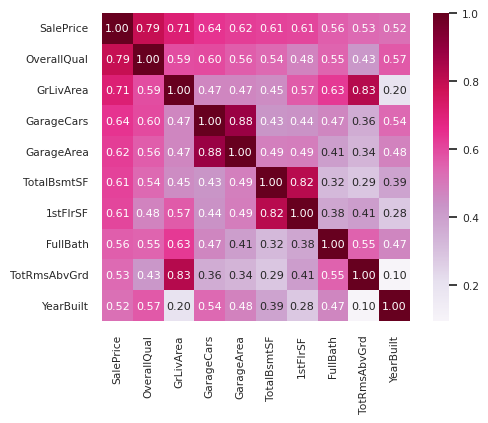

In [54]:
# Use a correlation matrix (with heatmap) to analyse the 
# relationship between 'SalePrice' and other numerical features
corrmat = data.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
hm = sns.heatmap(cm, cmap="PuRd", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

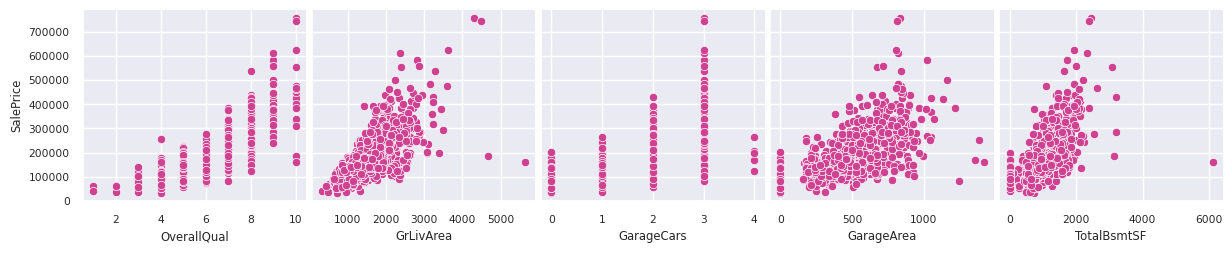

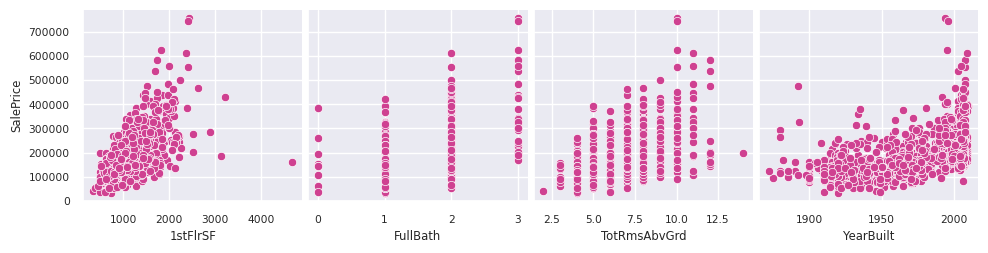

In [53]:
# Some scatterploots between the target and its highest correlated features
selected_features_1  = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
selected_features_2 = ['1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

sns.pairplot(data, x_vars=selected_features_1, y_vars= ['SalePrice'], size = 2.5)
plt.show();

sns.pairplot(data, x_vars=selected_features_2, y_vars= ['SalePrice'], size = 2.5)
plt.show();

## **2 - Data Preprocessing**
### **Handle Missing Data**

<Figure size 1600x500 with 0 Axes>

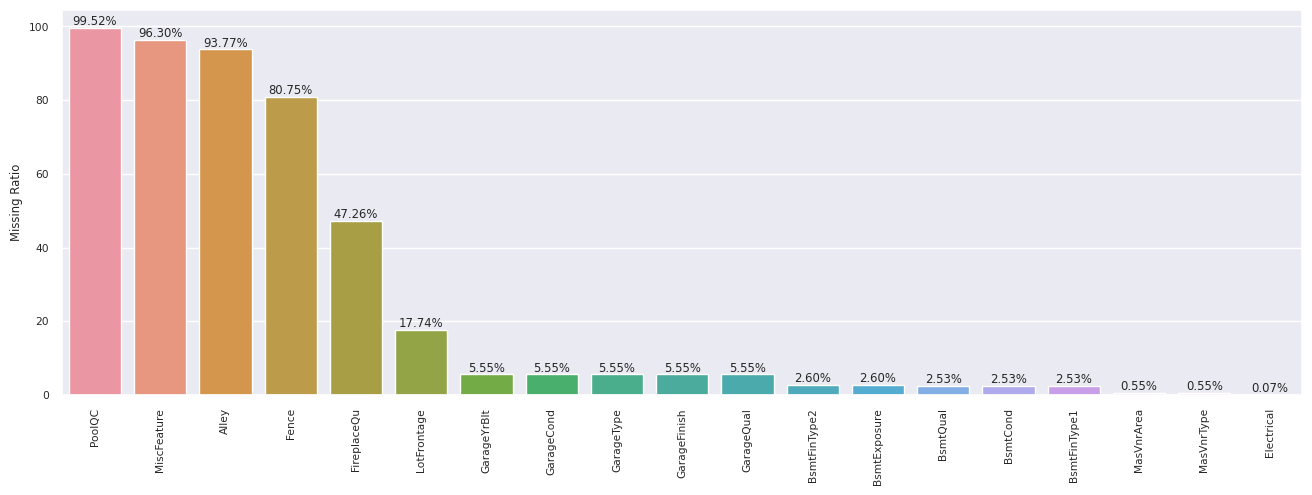

In [56]:
# Get all features with missing data
missing_data_ratio = (data.isnull().sum().sort_values(ascending=False) / len(data)) * 100

# Remove features with no missing values
missing_data_ratio = missing_data_ratio[missing_data_ratio > 0]

# Plot the bar chart
plt.figure(figsize = (16,5))
fig = plt.xticks(rotation='vertical')
missing_data = pd.DataFrame({'Missing Ratio' :missing_data_ratio})
ax = sns.barplot(x=missing_data.index, y = missing_data['Missing Ratio'])
ax = ax.bar_label(ax.containers[0], fmt='%.2f%%')

plt.show()

In [57]:
# Number of missing numerical values 
missing_num_vals = data.select_dtypes(exclude = 'object').isnull().sum().sort_values(ascending=False)
missing_num_ratio = data.select_dtypes(exclude = 'object').isnull().sum().sort_values(ascending=False) / len(data) * 100

# Remove features with no missing values
missing_num_vals = missing_num_vals[missing_num_vals > 0]
missing_num_ratio = missing_num_ratio[missing_num_ratio > 0]

# Concatenate values
pd.concat([missing_num_vals, missing_num_ratio], axis=1, keys=['Total', 'Ratio'])

,Total,Ratio
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945


In [58]:
# Number of missing categorical values 
missing_cat_vals = data.select_dtypes(include = 'object').isnull().sum().sort_values(ascending=False)
missing_cat_ratio = data.select_dtypes(include = 'object').isnull().sum().sort_values(ascending=False) / len(data) * 100

# Remove features with no missing values
missing_cat_vals = missing_cat_vals[missing_cat_vals > 0]
missing_cat_ratio = missing_cat_ratio[missing_cat_ratio > 0]

# Concatenate values
pd.concat([missing_cat_vals, missing_cat_ratio], axis=1, keys=['Total', 'Ratio'])

,Total,Ratio
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
GarageType,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageFinish,81,5.547945
BsmtFinType2,38,2.602740


In the case of the `PoolQC` feature, 99% of its values are missing and this occurs consistently when `PoolArea` is 0 (indicating the absence of a pool). Since `PoolQC` primarily captures the quality of the pool, it becomes irrelevant when there is no pool present. This suggests that the `PoolQC` feature does not  contribute much to the predictive power of the model. In this case, dropping the `PoolQC` feature can simplify the dataset and potentially improve the performance of the regression model.

Similarly, `FireplaceQu` shows missing values consistently when `Fireplaces` is 0 (meaning the house has no fireplace). This suggests that the `FireplaceQu` feature does not provide meaningful information for predicting house prices. Thus, we can also drop the `FireplaceQu` feature from the dataset.

The `MiscFeature` feature captures additional non-standard features of a house, such as a shed, tennis court, or other special amenities. If a house does not have any miscellaneous features, the value for `MiscFeature` is typically marked as missing, resulting in missing values, similarly to the `PoolQC` and `FireplaceQu` features. Once again, we can drop this feature.

Looking at the features `Fence` and `Alley`, it appears that a significant portion of their values are missing (80% and 93%, respectively). This shows that these values don't have much inpact in the model prediction and therefore, can be removed.

In [93]:
# Removing unimpactfull features
features_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
data = data.drop(features_to_drop, axis=1)

# Verify results
if any(feature in data.columns for feature in features_to_drop):
    print("Not all unimpactfull features were deleted.")
else:
    print("All unimpactfull festures were deleted.")

All unimpactfull festures were deleted.


Now, for the other features, we can use a **heatmap** to reveal interesting connections between missing values of the different features. 

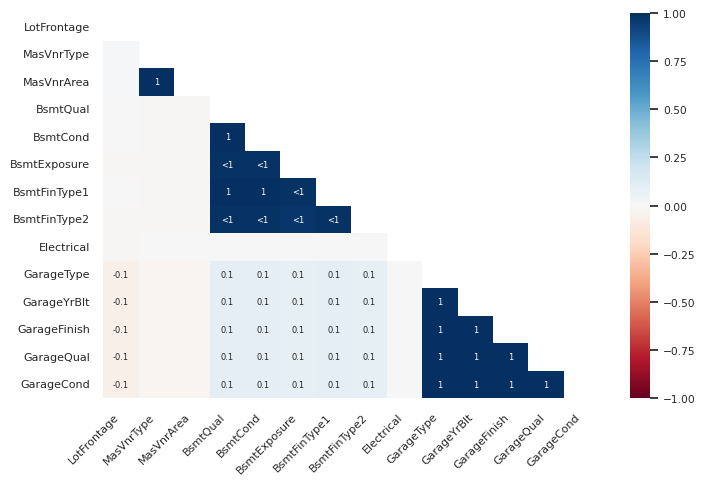

In [61]:
hm = msno.heatmap(data, figsize=(8, 5), fontsize=8)

Through analysing of the heatmap, we can observe certain values with perfect or almost perfect correspondences (i.e. 1 or <1). More specifically, we detect strong connections between the **garage-related values** (such as `GarageType` and `GarageQual`), the **basement-related values** (such as `BsmConf` and `BsmtQual`) and the **Masonry veneer-related values** (such as `MasVnrType` and `MasVnrArea`).

It seems that for **garage-related values** and the **basement-related values**, the missing values only* occur when `GarageArea` and `TotalBsmtSF` are 0. Therefore, it is resonable to assume that both the **garage-related values** and the **basement-related values** are missing in the dataset due to the absence of a garage/basement in these houses rather than being due to oversight. In other words these values are **not missing at random (MNAR)**

While the percentage of missing values is very low (5% for the garage and 2% for the basement) and we could simply remove the rows from the dataset, I am curious to see if the `SalePrice` feature could be influenced by the the presence or abcense of a garage/basement. Thus we decided to create two **binary features** named `HasGarage` and `HasBsmt`.

> *** **Note****: There is one missing value in `BsmtExposure` where the `TotalBsmtSF` is not 0. Since we cannot especulate the reason, I've decided to remove this entree from the dataset.

In [94]:
# Select features with null values for basement and garage
sf_garage = ["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]
sf_basement = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

# Create a new features 'HasGarage' and 'HasBsmt'
data['HasGarage'] = np.where(data['GarageArea'] > 0, 1, 0)
data['HasBasmt'] = np.where(data['TotalBsmtSF'] > 0, 1, 0)

# Replace missing values of garage and bsmt with 'NoGarage'and 'NoBasement'
data.loc[:, sf_garage] = data.loc[:, sf_garage].fillna('NoGarage')
data.loc[:, sf_basement] = data.loc[:, sf_basement].fillna('NoBasement')

# Verify the results
print("Missing values in garage after filtering:", data[sf_garage].isnull().sum())
print("Missing values in basement after filtering:", data[sf_basement].isnull().sum())

Missing values in garage after filtering: GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64
Missing values in basement after filtering: BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64


On the case of the **Masonry veneer-related values** however, it seems to be a correlation where when `MasVnrType` value is "None', then `MasVnrArea` is 0.0, which seems to be to account for situations where the house does not have a Masonry veneer. Therefore, we can not assume that when the value for `MasVnrType` NaN that it also means the house does not have a Masonry veneer, and instead it seems to signify that these values are infact **missing at random (MAR)**. While there's a 1:1 relationship or dependency between the missing values of the two features, its hard to conjecture a reason for the missing values. And since the Missing Percentage of both of these values is <1%, we can just remove these rows from the dataset.

In [95]:
# Remove rows with missing values 
data = data.dropna(subset = ['MasVnrType'])
data = data.dropna(subset = ['MasVnrArea'])

# Verify the results
print("Missing values in MasVnrType after filtering:", data['MasVnrType'].isnull().sum())
print("Missing values in MasVnrArea after filtering:", data['MasVnrArea'].isnull().sum())

Missing values in MasVnrType after filtering: 0
Missing values in MasVnrArea after filtering: 0


The`Electrical` feature has only one missing value, therefore is better to just remove the entree with the missing value from the dataset and keep the feature.

In [96]:
# Remove rows with missing values in Electrical
data = data.dropna(subset = ['Electrical'])

# Verify the results
print("Missing values in Electrical after filtering:", data['Electrical'].isnull().sum())

Missing values in Electrical after filtering: 0


Lastly, we have handle the `LotFrontage` feature missing values. A good way to do this is to estimate the missing value using other features in the dataset. To do this, first, let's find which features have a strong correlation with the `LotFrontage`. 

Let's try using a correlation matrix to find which features have a higher corrleation with `LotFrontage`.


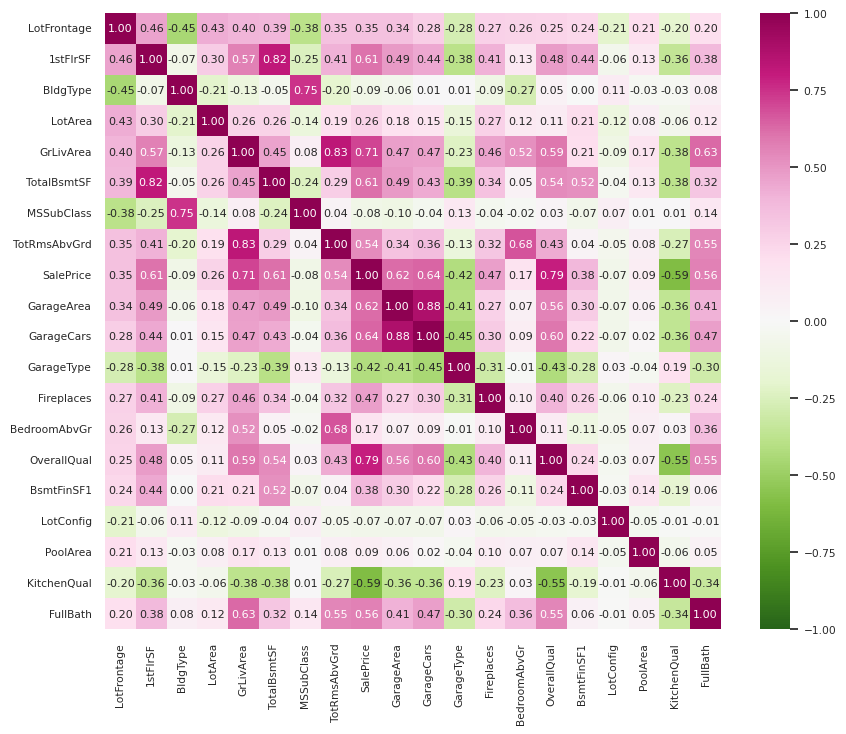

In [66]:
from sklearn.preprocessing import LabelEncoder

# Create a dummy from the train dataset
data_dummy = data.copy()

# Define the categorical features for one-hot encoding
categorical_features = data_dummy.select_dtypes(include=['object']).columns.tolist()

# Encode categorical features using Label Enconding
encoder = LabelEncoder()

for col in categorical_features:
    data_dummy[col] = data_dummy[col].astype(str)  # Convert to string
    data_dummy[col] = encoder.fit_transform(data_dummy[col])

# Create a correlation matrix (heatmap)
corrmat = data_dummy.corr()
top_correlated_features = corrmat['LotFrontage'].abs().sort_values(ascending=False)[:20].index
corr_filtered = corrmat.loc[top_correlated_features, top_correlated_features]
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(corr_filtered, annot=True, square=True, cmap='PiYG_r', fmt='.2f', annot_kws={'size': 8}, vmin=-1, vmax=1)
plt.show()

Now,some of these feature are highly correlated with eachother as well, which could implicate **multicollinearity**. To avoid this, in this cases we will only keep one of the features to include in the model. 

Now let's actually try to imput LotFrontage missing values using a model based on this features. I'll be using `Support Vector Regressor (SVR)` to build the model.

In [97]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = ['1stFlrSF', 'BldgType', 'LotArea', 'GrLivArea', 'GarageArea', 'GarageType', 'Fireplaces', 'LotFrontage']
data_dummy = data[features].copy()  # Create a copy of the original dataset

# Label encode the categorical features in the encoded dataset
encoder = LabelEncoder()
data_dummy['BldgType'] = encoder.fit_transform(data_dummy['BldgType'])
data_dummy['GarageType'] =encoder.fit_transform(data_dummy['GarageType'])

# Split the data into features (data) and target variable (y)
X = data_dummy.dropna().drop('LotFrontage', axis=1)
y = data_dummy.dropna()['LotFrontage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR model
svr = SVR()

# Fit the model on the training data
svr = svr.fit(X_train, y_train)

# Predict the missing values for LotFrontage in the original dataset
lotfrontage_missing = data_dummy[data_dummy['LotFrontage'].isnull()].drop('LotFrontage', axis=1)
predicted_lotfrontage = svr.predict(lotfrontage_missing)

# Assign the predicted values back to the original dataset
data.loc[data['LotFrontage'].isnull(), 'LotFrontage'] = predicted_lotfrontage

# Verify the results
print("Missing values in LotFrontage after filtering:", data['LotFrontage'].isnull().sum())

Missing values in LotFrontage after filtering: 0


In [99]:
# Check if we still have features with missing values
print("Features with missing values:", data.columns[data.isnull().any()].tolist())

Features with missing values: []


### **Detecting Outliers**

While looking ate the data, we can detect some outliers:
   
   * Houses with `GrdLivArea` more than 4000 are outliers
   * Houses with `LotArea` bigger than 1000000 are outliers
   * Houses were the `SalePrice` is outside the 99.5% quantile are outliers
   

In [98]:
# Check new dataset size
data.shape

(1451, 78)

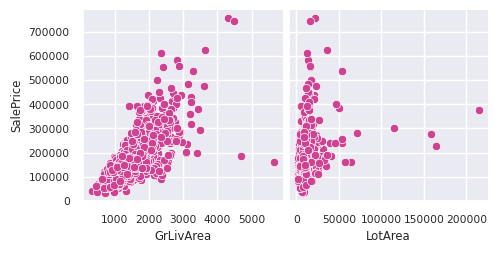

In [100]:
selected_features = ['GrLivArea', 'LotArea']
sns.pairplot(data, x_vars=selected_features, y_vars= ['SalePrice'], size = 2.5)
plt.show();

In [101]:
# Calculate the quantile value for the 'SalePrice'
data['SalePrice'].quantile(0.995)

528959.25

In [102]:
# Remove outliers
outliers = data[data['GrLivArea'] > 4000].index
outliers = outliers.append(data[data['LotArea'] > 100000].index)
outliers = outliers.append(data[data['SalePrice'] > data['SalePrice'].quantile(0.995)].index)

data.drop(outliers,inplace=True)

Additionally, categorical features with one predominant value across all observations are barely correlated to `SalePrice` and therefore their prediction value is irrelevant. The features with predominant values (zeros or ones in particular) may lead to sparse datasets and poorer regressions.

Thefore the features with one predominant value present in more than **99.5%** of all observations are identified and dropped.

In [103]:
# Get all categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Identifying features with one prodominant value across all entrees
features_to_drop = []
for feature in categorical_features:
    predominant_value_count = data[feature].value_counts().max()
    if predominant_value_count / data.shape[0] > 0.995:
        features_to_drop.append(feature)
print(f'\nCategorical features to be dropped: {features_to_drop}')

# Drop unnecessary features
data = data.drop(features_to_drop, axis=1)


Categorical features to be dropped: ['Street', 'Utilities']


In [104]:
# Check new dataset size
data.shape

(1437, 76)

### **Handling Categorical Values**

In [105]:
from sklearn.preprocessing import OrdinalEncoder

# Get all categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

data_no_cat = data.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
data_no_cat[categorical_features] = ordinal_encoder.fit_transform(data_no_cat[categorical_features].astype(str))

In [107]:
data_no_cat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage,HasBasmt
0,1,60,3.0,65.0,8450,3.0,3.0,4.0,0.0,5.0,...,0,0,0,2,2008,8.0,4.0,208500,1,1
1,2,20,3.0,80.0,9600,3.0,3.0,2.0,0.0,24.0,...,0,0,0,5,2007,8.0,4.0,181500,1,1
2,3,60,3.0,68.0,11250,0.0,3.0,4.0,0.0,5.0,...,0,0,0,9,2008,8.0,4.0,223500,1,1
3,4,70,3.0,60.0,9550,0.0,3.0,0.0,0.0,6.0,...,0,0,0,2,2006,8.0,0.0,140000,1,1
4,5,60,3.0,84.0,14260,0.0,3.0,2.0,0.0,15.0,...,0,0,0,12,2008,8.0,4.0,250000,1,1


## **Slip data**

In [108]:
# Separe target from predictors
y = data_no_cat.SalePrice
X = data_no_cat.drop(['SalePrice'], axis=1)

## **Feature Correlation**

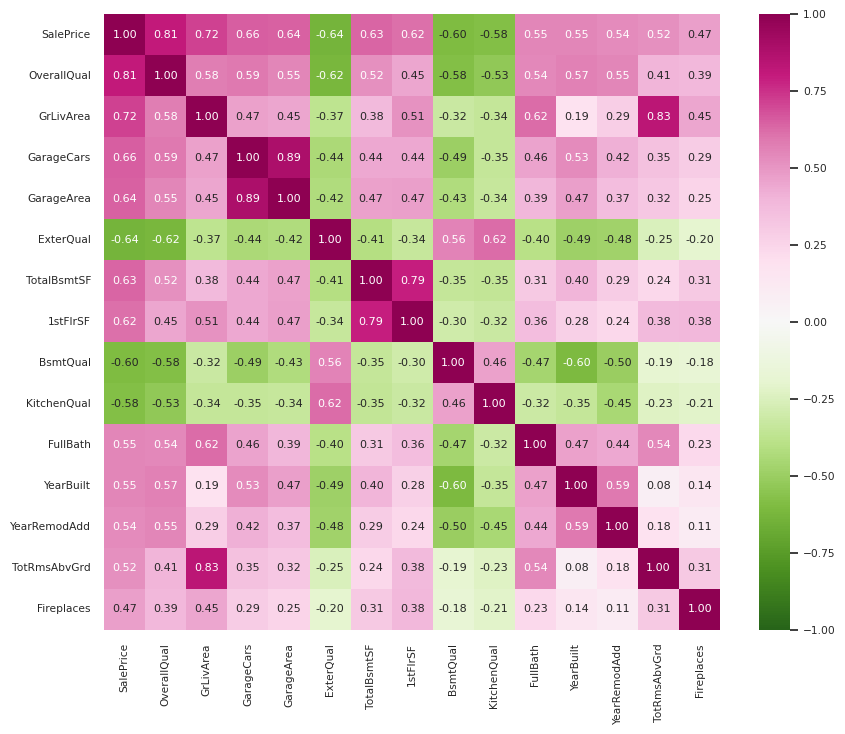

In [110]:
# Create a correlation matrix (heatmap)
corrmat = data_no_cat.corr()
top_correlated_features = corrmat['SalePrice'].abs().sort_values(ascending=False)[:15].index
corr_filtered = corrmat.loc[top_correlated_features, top_correlated_features]
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(corr_filtered, annot=True, square=True, cmap='PiYG_r', fmt='.2f', annot_kws={'size': 8}, vmin=-1, vmax=1)
plt.show()

Since these are the features with highest correlation to the target `SalePrice` we are going to use them to create the prediction models.

## **Test models**

In [111]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We are going to test the effectivity of 6 different models: 
* Linear Regression, 
* Decision Trees, 
* Random Forests,  
* Support Vector Machines (SMV) 
* Neural Networks

To do this we are going to use the following method to calculate de RMSE of each model

In [112]:
from sklearn.metrics import mean_squared_error

def calc_rmse(test, pred):
    # Calculate RMSE mean
    rmse_mean = np.sqrt(mean_squared_error(test, pred))

    # Calculate RMSE stdev
    rmse_stdev = np.std(test - pred)
    
    return (rmse_mean, rmse_stdev)

### LINEAR REGRESSION

In [113]:
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model on the training data using only the selected features
fit = model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the Model
calc_rmse(y_test, y_pred)

(24291.68145076835, 24283.27856145614)

### GradientBoostingRegressor

In [177]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor(n_estimators=1100, loss='squared_error', subsample = 0.35, learning_rate = 0.05,random_state=1)
fit = model_GBR.fit(X_train, y_train)
y_pred = model_GBR.predict(X_test)

# Evaluate the Model
calc_rmse(y_test, y_pred)

(21478.733928845122, 21465.122377464384)

### Decision Tree

In [183]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

tree_model = DecisionTreeRegressor(criterion='friedman_mse',max_depth=2000)
fit = tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

calc_rmse(y_test, y_pred)

random_model = DecisionTreeClassifier(max_depth=1000)
fit = random_model.fit(X_train, y_train)
y_pred = random_model.predict(X_test)

calc_rmse(y_test, y_pred)

(34634.40326943516, 34604.00881154888)

(46331.12371237491, 45967.86641398881)

### Support Vector Machines (SMV)

In [185]:
from sklearn.svm import SVR

# Create an SVR model
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Fit the model on the training data
svr = svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

calc_rmse(y_test, y_pred)

(31816.040722808313, 31761.916042162098)

### Tensor flow

In [184]:
import tensorflow as tf
from tensorflow import keras

tensor_model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

tensor_model.compile(optimizer='adam', loss='mean_squared_error')

tensor_model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = tensor_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print((mse, rmse))

Epoch 1/10
36/36 [==============================] - 1s 2ms/step - loss: 37298196480.0000
Epoch 2/10
36/36 [==============================] - 0s 2ms/step - loss: 37298184192.0000
Epoch 3/10
36/36 [==============================] - 0s 2ms/step - loss: 37298188288.0000
Epoch 4/10
36/36 [==============================] - 0s 2ms/step - loss: 37298184192.0000
Epoch 5/10
36/36 [==============================] - 0s 2ms/step - loss: 37298184192.0000
Epoch 6/10
36/36 [==============================] - 0s 2ms/step - loss: 37298184192.0000
Epoch 7/10
36/36 [==============================] - 0s 3ms/step - loss: 37298188288.0000
Epoch 8/10
36/36 [==============================] - 0s 2ms/step - loss: 37298184192.0000
Epoch 9/10
36/36 [==============================] - 0s 2ms/step - loss: 37298184192.0000
Epoch 10/10
36/36 [==============================] - 0s 2ms/step - loss: 37298188288.0000


9/9 [==============================] - 0s 2ms/step
(34885009587.06597, 186775.29169316258)
